# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher-1.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
# Reset environment
env_info = env.reset(train_mode=False)[brain_name]

# Get current state (for each agent)
states = env_info.vector_observations 

# Initialize score (for each agent)
scores = np.zeros(num_agents)

while True:
    
    # Select action (for each agent)
    actions = np.random.randn(num_agents, action_size) 
    actions = np.clip(actions, -1, 1)  # Clip all actions between -1 and 1
    
    # Send actions to the environment
    env_info = env.step(actions)[brain_name]
    
    # Results 
    next_states = env_info.vector_observations  # Next state (for each agent)  
    rewards = env_info.rewards  # Reward (for each agent)
    dones = env_info.local_done  # See if episode finished
    scores += env_info.rewards  # Update score (for each agent)
    
    # Roll states to next time step
    states = next_states
    
    # Exit loop if episode finished
    if np.any(dones):
        break

print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

<br> 

#### Imports

In [5]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

<br>

#### Agent

Instantiate 

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=10)

<br> 

Train

In [7]:
def ddpg(n_episodes=3000, max_t=10000, print_every=100):
    
    scores_deque = deque(maxlen=print_every) # Last 'print_every' scores
    scores = [] # All scores 
    
    # Iterate over episodes 
    for i_episode in range(1, n_episodes+1):
        
        # Reset environment, state, agent, and score 
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]  # Current state 
        agent.reset()
        score = 0
        
        # Iterate over time steps 
        for t in range(max_t): 
            
            # Action (for each agent)
            action = agent.act(state)
            
            # Send actions to the environment
            env_info = env.step(action)[brain_name]
            
            # Results 
            next_state = env_info.vector_observations[0]  # Next state (for each agent)  
            reward = env_info.rewards[0]  # Reward (for each agent)
            done = env_info.local_done[0]  # See if episode finished

            # Step 
            agent.step(state, action, reward, next_state, done)

            score += reward  # Update score (for each agent)
            state = next_state  # Move current state forward 
            
            # If envionment is over, break 
            if done:
                break 
        
        # Save scores
        scores_deque.append(score)
        scores.append(score)
        
        # Save Actor & Critic Weights 
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        # Print current episode, score, and average of last 'print_every' scores
        print('\rEpisode {} \tScore: {:.2f} \tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_deque)))
        
        # Environment solved when average of last 100 scores is greater or equal to 30
        if np.mean(scores_deque) >= 30.0: 
            print('Environment solved in {:d} episodes! Average score of {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
        
    return scores

scores = ddpg()

/Users/wilsonchan/opt/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1 	Score: 0.54 	Average Score: 0.54
Episode 2 	Score: 1.37 	Average Score: 0.95
Episode 3 	Score: 1.11 	Average Score: 1.01
Episode 4 	Score: 0.96 	Average Score: 0.99
Episode 5 	Score: 2.48 	Average Score: 1.29
Episode 6 	Score: 2.36 	Average Score: 1.47
Episode 7 	Score: 0.67 	Average Score: 1.36
Episode 8 	Score: 0.48 	Average Score: 1.25
Episode 9 	Score: 1.14 	Average Score: 1.23
Episode 10 	Score: 1.02 	Average Score: 1.21
Episode 11 	Score: 1.96 	Average Score: 1.28
Episode 12 	Score: 2.82 	Average Score: 1.41
Episode 13 	Score: 2.97 	Average Score: 1.53
Episode 14 	Score: 1.13 	Average Score: 1.50
Episode 15 	Score: 1.12 	Average Score: 1.48
Episode 16 	Score: 2.02 	Average Score: 1.51
Episode 17 	Score: 2.09 	Average Score: 1.54
Episode 18 	Score: 1.82 	Average Score: 1.56
Episode 19 	Score: 1.21 	Average Score: 1.54
Episode 20 	Score: 1.98 	Average Score: 1.56
Episode 21 	Score: 1.23 	Average Score: 1.55
Episode 22 	Score: 2.24 	Average Score: 1.58
Episode 23 	Score: 

<br> 

Plot

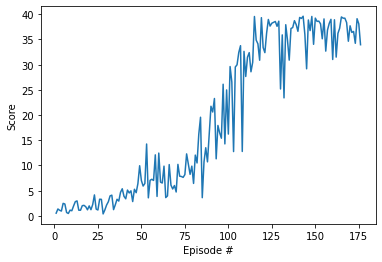

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

<br> 

Load Weights

In [ ]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

<br> 

Watching a Smart Agent

In [12]:
# Reset Environment 
env.reset(train_mode=False)[brain_name]

# Current state 
state = env_info.vector_observations[0]  

# Initialize score
score = 0

for t in range(10000):
    
    # Action
    action = agent.act(state, add_noise=False)
    
    # Take a step in the environment        
    env_info = env.step(action)[brain_name] 
        
    # Next State
    next_state = env_info.vector_observations[0]
            
    # Reward
    reward = env_info.rewards[0]
            
    # Done 
    done = env_info.local_done[0]
        
    # Move state forwards 
    state = next_state
            
    # Cumulatively sum reward 
    score += reward
    
    print('Score:', score, end='\r')
    
    # If simulation is over, break 
    if done:
        break

<br> 

Close Environment

In [13]:
env.close()

<br>